In [36]:
# Import definition
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_predict
import matplotlib.pyplot as plt

THRESHOLD = 0.5

In [37]:
# ------------------ PREPROCESSING AND DATA FILTERING -------------------- #

# Loading dataset into working desk
data = arff.loadarff('../data/kin8nm.arff')
df = pd.DataFrame(data[0])

#Removes NaN values from dataset by deleting rows
df.dropna(axis=0, how='any', inplace=True)

# Gets X (data matrix) and y (target values column matrix)
X = df.drop("y", axis=1).to_numpy()
y = df['y'].to_numpy()

[0.01245163 0.2850772  0.01106837 ... 0.02158443 0.07848334 0.22722234]
[-0.00831015 -0.03392083 -0.02012649 ...  0.00033972 -0.10698858
 -0.00475362]


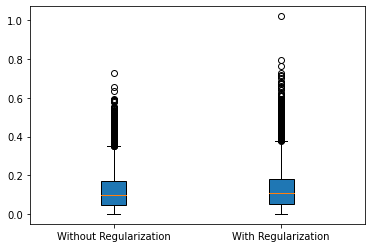

In [38]:
# Creates a 5 fold cross validator
skf = KFold(n_splits=5, shuffle=True, random_state=0)

#MLP regressor without regularization
mlp_1 = MLPRegressor(hidden_layer_sizes=(3, 2), alpha= 0, activation='relu', learning_rate='constant', learning_rate_init=0.001, max_iter=2000, random_state=0)

# Performs a cross validate to train and get predict values
y_predicted = cross_val_predict(mlp_1, X, y.ravel(), cv=skf).ravel()

#Calculate the residues
residues_1 = np.absolute(np.subtract(y, y_predicted))


#MLP regressor with regularization (L2) (SOMETHING WRONG IS NOT RIGHT)
mlp_2 = MLPRegressor(hidden_layer_sizes=(3, 2), alpha = 0.1, activation='relu', learning_rate='constant', learning_rate_init=0.001, max_iter=2000, random_state=0)

# Performs a cross validate to train and get predict values
y_predicted = cross_val_predict(mlp_2, X, y.ravel(), cv=skf).ravel()

#Calculate the residues
residues_2 = np.absolute(np.subtract(y, y_predicted))


# Debug
verificar = np.subtract(residues_1, residues_2)
print(verificar)

#Plot residues
plt.boxplot([residues_1, residues_2], patch_artist = True, labels = ['Without Regularization', 'With Regularization'])

#Show plot
plt.show()


In [39]:
print('Mean Absolute Error', sum(residues_1)/len(residues_1.tolist()))
print('Root Mean Error', np.power(sum(np.power(residues_1, 2))/len(residues_1.tolist()), 0.5))
print('Mean Absolute Error', sum(residues_2)/len(residues_2.tolist()))
print('Root Mean Error', np.power(sum(np.power(residues_2, 2))/len(residues_2.tolist()), 0.5))

Mean Absolute Error 0.12130354668201487
Root Mean Error 0.15536299351740723
Mean Absolute Error 0.13074994520350539
Root Mean Error 0.1690991523624634
